In [2]:
from __future__ import division
from __future__ import print_function


import os
os.getcwd() 


import json
import random
import numpy as np
import pandas as pd

from Tools import Operations
import DataGenerator

import pandas as pd
import numpy as np
import random
from scipy.spatial.distance import pdist, squareform
import math
random.seed(78672)

from main import dataCleaner


mac = False

if mac :
	UM_LatLon_dir = '/Users/sam/All-Program/App-DataSet/Data-Science-Projects/Geo-Spatial-Analysis/UM_transactions_devices.csv'
	Device_LatLon_dir = '/Users/sam/All-Program/App-DataSet/Data-Science-Projects/Geo-Spatial-Analysis/UM_devices_address_latlong.csv'
else:
	UM_LatLon_dir = 'C:\\Users\\swmishr\\Documents\\All-Program\\App-Dataset\\Geo-Spatial-Analysis\\Cluster\\UM_transactions_devices.csv'
	Device_LatLon_dir = "C:\\Users\\swmishr\\Documents\\All-Program\\App-Dataset\\Geo-Spatial-Analysis\\Cluster\\UM_devices_address_latlong.csv"

In [3]:
data = pd.read_csv(UM_LatLon_dir, header=None)
data.columns = ['deviceID', 'Latitude', 'Longitude', 'timestamp']
print (data.shape)
data.head()

(580804, 4)


<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>deviceID</th>
      <th>Latitude</th>
      <th>Longitude</th>
      <th>timestamp</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>01334d30c243b3724a62aaa8865dd51fdcdefcb3</td>
      <td>42.770346</td>
      <td>-84.405242</td>
      <td>2016-03-11 07:20</td>
    </tr>
    <tr>
      <th>1</th>
      <td>01334d30c243b3724a62aaa8865dd51fdcdefcb3</td>
      <td>42.770348</td>
      <td>-84.405240</td>
      <td>2016-03-21 06:20</td>
    </tr>
    <tr>
      <th>2</th>
      <td>01334d30c243b3724a62aaa8865dd51fdcdefcb3</td>
      <td>42.770484</td>
      <td>-84.405478</td>
      <td>2016-04-05 10:10</td>
    </tr>
    <tr>
      <th>3</th>
      <td>01334d30c243b3724a62aaa8865dd51fdcdefcb3</td>
      <td>42.770354</td>
      <td>-84.405407</td>
      <td>2016-04-17 08:20</td>
    </tr>
    <tr>
      <th>4</th>
      <td>01334d30c243b3724a62aaa8865dd51fdcdefcb3</td>
      <td>42.770433</td>
      <td>-84.405560</td>
      <td>2016-04-29 23:00</td>
    </tr>
  </tbody>
</table>
</div>

#### Data Filtering:
------------------

In [101]:
from datetime import datetime

dt = datetime.strptime("2017-08-4 16:30", "%Y-%m-%d %H:%M") # "21/11/06 16:30"
dd  = dt.timetuple()
print (dd)

dt = datetime.strptime("2017-08-5 16:30", "%Y-%m-%d %H:%M") # "21/11/06 16:30"
dd  = dt.timetuple()
print (dd)

dt = datetime.strptime("2017-08-6 16:30", "%Y-%m-%d %H:%M") # "21/11/06 16:30"
dd  = dt.timetuple()
print (dd)#.hour

dt = datetime.strptime("2017-08-7 16:30", "%Y-%m-%d %H:%M") # "21/11/06 16:30"
dd  = dt.timetuple()
print (dd)

dt = datetime.strptime("2017-08-8 16:30", "%Y-%m-%d %H:%M") # "21/11/06 16:30"
dd  = dt.timetuple()
print (dd)

dt = datetime.strptime("2017-08-9 16:30", "%Y-%m-%d %H:%M") # "21/11/06 16:30"
dd  = dt.timetuple()
print (dd)

time.struct_time(tm_year=2017, tm_mon=8, tm_mday=4, tm_hour=16, tm_min=30, tm_sec=0, tm_wday=4, tm_yday=216, tm_isdst=-1)
time.struct_time(tm_year=2017, tm_mon=8, tm_mday=5, tm_hour=16, tm_min=30, tm_sec=0, tm_wday=5, tm_yday=217, tm_isdst=-1)
time.struct_time(tm_year=2017, tm_mon=8, tm_mday=6, tm_hour=16, tm_min=30, tm_sec=0, tm_wday=6, tm_yday=218, tm_isdst=-1)
time.struct_time(tm_year=2017, tm_mon=8, tm_mday=7, tm_hour=16, tm_min=30, tm_sec=0, tm_wday=0, tm_yday=219, tm_isdst=-1)
time.struct_time(tm_year=2017, tm_mon=8, tm_mday=8, tm_hour=16, tm_min=30, tm_sec=0, tm_wday=1, tm_yday=220, tm_isdst=-1)
time.struct_time(tm_year=2017, tm_mon=8, tm_mday=9, tm_hour=16, tm_min=30, tm_sec=0, tm_wday=2, tm_yday=221, tm_isdst=-1)


In [95]:
for num, ts in enumerate(np.array(data.loc[1:100,['timestamp']])):
    dt = datetime.strptime(ts[0], "%Y-%m-%d %H:%M")
    dtt  = dt.timetuple()
    if dtt.tm_hour >= 20 or dtt.tm_hour <= 8:
        print (dtt, '\n')
        
    if dtt.tm_mon == 3:
        print (dtt, '\n')

time.struct_time(tm_year=2016, tm_mon=3, tm_mday=21, tm_hour=6, tm_min=20, tm_sec=0, tm_wday=0, tm_yday=81, tm_isdst=-1) 

time.struct_time(tm_year=2016, tm_mon=4, tm_mday=17, tm_hour=8, tm_min=20, tm_sec=0, tm_wday=6, tm_yday=108, tm_isdst=-1) 

time.struct_time(tm_year=2016, tm_mon=4, tm_mday=29, tm_hour=23, tm_min=0, tm_sec=0, tm_wday=4, tm_yday=120, tm_isdst=-1) 

time.struct_time(tm_year=2016, tm_mon=3, tm_mday=4, tm_hour=0, tm_min=50, tm_sec=0, tm_wday=4, tm_yday=64, tm_isdst=-1) 

time.struct_time(tm_year=2016, tm_mon=3, tm_mday=4, tm_hour=0, tm_min=50, tm_sec=0, tm_wday=4, tm_yday=64, tm_isdst=-1) 

time.struct_time(tm_year=2016, tm_mon=3, tm_mday=29, tm_hour=21, tm_min=30, tm_sec=0, tm_wday=1, tm_yday=89, tm_isdst=-1) 



In [6]:
dataCleaned = dataCleaner(dataIN=data)[['Latitude','Longitude']]
print (dataCleaned.shape)
dataCleaned.head()

(543695, 2)


<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Latitude</th>
      <th>Longitude</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>42.770346</td>
      <td>-84.405242</td>
    </tr>
    <tr>
      <th>1</th>
      <td>42.770348</td>
      <td>-84.405240</td>
    </tr>
    <tr>
      <th>2</th>
      <td>42.770484</td>
      <td>-84.405478</td>
    </tr>
    <tr>
      <th>3</th>
      <td>42.770354</td>
      <td>-84.405407</td>
    </tr>
    <tr>
      <th>4</th>
      <td>42.770433</td>
      <td>-84.405560</td>
    </tr>
  </tbody>
</table>
</div>

#### Build K-nearest Neighbor with Haversine distance:
--------------------

In [27]:
from scipy.spatial.distance import pdist, squareform
distance_matrix = squareform(pdist(dataCleaned, (lambda u,v: haversine(u,v))))
distanceMatrix.shape
# db = DBSCAN(eps=0.2, min_samples=2, metric='precomputed')  # using "precomputed" as recommended by @Anony-Mousse
# y_db = db.fit_predict(distance_matrix)
# 
# X['cluster'] = y_db

MemoryError: 

In [36]:
X = np.array([[19.111841,   72.910729],
[19.111342,   72.908387],
[19.111342,   72.908387],
[19.137815,   72.914085],
[19.119677,   72.905081],
[19.119677,   72.905081],
[19.119677,   72.905081],
[19.120217,   72.907121],
[19.120217,   72.907121],
[19.119677,   72.905081],
[19.119677,   72.905081],
[19.119677,   72.905081],
[19.111860,   72.911346],
[19.111860,   72.911346],
[19.119677,   72.905081],
[19.119677,   72.905081],
[19.119677,   72.905081],
[19.137815,   72.914085],
[19.115380,   72.909144],
[19.115380,   72.909144],
[19.116168,   72.909573],
[19.119677,   72.905081],
[19.137815,   72.914085],
[19.137815,   72.914085],
[19.112955,   72.910102],
[19.112955,   72.910102],
[19.112955,   72.910102],
[19.119677,   72.905081],
[19.119677,   72.905081],
[19.115380,   72.909144],
[19.119677,   72.905081],
[19.119677,   72.905081],
[19.119677,   72.905081],
[19.119677,   72.905081],
[19.119677,   72.905081],
[19.111860,   72.911346],
[19.111841,   72.910729],
[19.131674,   72.918510],
[19.119677,   72.905081],
[19.111860,   72.911346],
[19.111860,   72.911346],
[19.111841,   72.910729],
[19.111841,   72.910729],
[19.111841,   72.910729],
[19.115380,   72.909144],
[19.116625,   72.909185],
[19.115671,   72.908985],
[19.119677,   72.905081],
[19.119677,   72.905081],
[19.119677,   72.905081],
[19.116183,   72.909646],
[19.113827,   72.893833],
[19.119677,   72.905081],
[19.114100,   72.894985],
[19.107491,   72.901760],
[19.119677,   72.905081]], dtype='float64')

X = pd.DataFrame(X)
X.columns = ['Latitude', 'Longitude']
X.head()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Latitude</th>
      <th>Longitude</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>19.111841</td>
      <td>72.910729</td>
    </tr>
    <tr>
      <th>1</th>
      <td>19.111342</td>
      <td>72.908387</td>
    </tr>
    <tr>
      <th>2</th>
      <td>19.111342</td>
      <td>72.908387</td>
    </tr>
    <tr>
      <th>3</th>
      <td>19.137815</td>
      <td>72.914085</td>
    </tr>
    <tr>
      <th>4</th>
      <td>19.119677</td>
      <td>72.905081</td>
    </tr>
  </tbody>
</table>
</div>

In [41]:
def haversine1(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # In Kilometer

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) \
                                                  * math.cos(math.radians(lat2)) * math.sin(dlon / 2) * math.sin(
        dlon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [42]:
def haversine(lonlat1, lonlat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lat1, lon1 = lonlat1
    lat2, lon2 = lonlat2
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

[ 0 -1 -1 -1  1  1  1 -1 -1  1  1  1  0  0  1  1  1 -1  2  2  2  1 -1 -1  0
  0  0  1  1  2  1  1  1  1  1  0  0 -1  1  0  0  0  0  0  2  2  2  1  1  1
  2 -1  1 -1 -1  1]


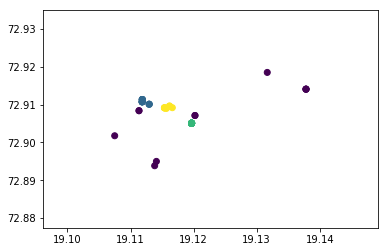

In [43]:
from sklearn.cluster import DBSCAN
import matplotlib.pylab as plt
%matplotlib inline
Xcpy = X
distance_matrix = squareform(pdist(Xcpy, (lambda u,v: haversine1(u,v))))
distance_matrix.shape

db = DBSCAN(eps=0.2, min_samples=5, metric='precomputed')  # using "precomputed" as recommended by @Anony-Mousse
y_db = db.fit_predict(distance_matrix)

print (y_db)
Xcpy['cluster'] = y_db
Xcpy

plt.scatter(Xcpy['Latitude'], Xcpy['Longitude'], c=Xcpy['cluster'])
plt.show()